# Mini Project #1  
**Due: Sep. 10, 2025**


## 1a.
A system has generated outputs marked by vector `d` in response to inputs which are listed in vector `x`:

- d = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 12.7972, 11.6371]  
- x = [1, 1.7143, 2.4286, 3.1429, 3.8571, 4.5714, 5.4857, 6]

Use the theory of regression to fit a line to this data.  
Measure the cost function defined as the mean of squared errors.  
Plot your data points and the line that models the system’s function.


In [132]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [133]:
x_no_bias = np.array([
    [1],
    [1.7143],
    [2.4286],
    [3.1429],
    [3.8571],
    [4.5714],
    [5.4857],
    [6]
])


#for x, we add a column of 1's for bias
x = np.array([
    [1,      1],
    [1.7143, 1],
    [2.4286, 1],
    [3.1429, 1],
    [3.8571, 1],
    [4.5714, 1],
    [5.4857, 1],
    [6,      1]
])

d = np.array([6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 12.7972, 11.6371])


In [134]:
#We frame it problem as   x     w   =     d
#where x is the input data, d is the output, and w is the set of weights. 
#For linear regression, w is a vector contianing a (the slope), and b (the initial value) 
#The solution to an equation in the form A x = b is A_cross * b, where A_cross = (A_transpose * A)^-1 A_transpose, where A_cross is the pseudoinverse

x_T = x.T
x_cross = np.dot((LA.inv(x_T @ x)),x_T)
w = x_cross @ d
a, b = w

In [135]:
#Measure the error value:
squared_error= 0

for i in range(len(d)):
    pred = a * x_no_bias[i,0] + b
    error = pred - d[i]
    squared_error += error**2

mse = squared_error/len(d)

# alternatively, a loop was not required, it would have been simple to simply compare the
# entire prediction vector against the actual outputs in one go, I will do this later in 1e.

print("The Error of Linear Regression is:",mse)

The Error of Linear Regression is: 1.7872722572247461


([1.], 6.0532)
([1.7143], 7.3837)
([2.4286], 10.0891)
([3.1429], 11.0829)
([3.8571], 13.2337)
([4.5714], 12.671)
([5.4857], 12.7972)
([6.], 11.6371)


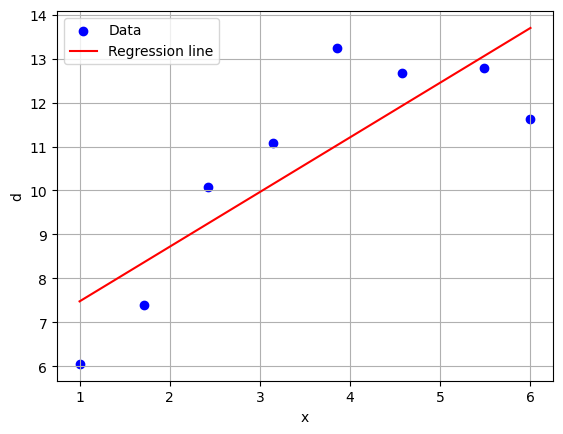

In [136]:
#PLOT LINEAR REGRESSION
for xi, yi in zip(x_no_bias, d):
    print(
        f"({xi}, {yi})")

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of your data points
plt.scatter(x_no_bias, d, color="blue", label="Data")

# Regression line: y = a*x + b
xx = np.linspace(min(x_no_bias), max(x_no_bias), 100)
yy = a*xx + b

plt.plot(xx, yy, color="red", label="Regression line")

plt.xlabel("x")
plt.ylabel("d")
plt.legend()
plt.grid(True)
plt.show()

## 1b.
Use the same data but this time fit a **second order polynomial** to these data points.  
What’s the value of your cost function?  
Plot the second order curve.



In [137]:
#Now, we are doing second order polynomial, so I will add a column of degree 2 as the first column.
x_second = np.array([
    [1**2,      1,      1],
    [1.7143**2, 1.7143, 1],
    [2.4286**2, 2.4286, 1],
    [3.1429**2, 3.1429, 1],
    [3.8571**2, 3.8571, 1],
    [4.5714**2, 4.5714, 1],
    [5.4857**2, 5.4857, 1],
    [6**2,      6,      1]
])


x_second_T = x_second.T

x_second_cross = np.dot((LA.inv(x_second_T @ x_second)),x_second_T)

w_second= x_second_cross @ d

a_second, b_second, c_second = w_second

print(w_second)


[-0.52837073  4.98061174  1.09191476]


In [138]:
#Measure the error value:
squared_error_second= 0

for i in range(len(d)):
    pred_second = a_second * x_second[i,0] + b_second * x_second[i,1] + c_second
    error_second = pred_second - d[i]
    squared_error_second += error_second**2

mse_second = squared_error_second/len(d)
print("The Error of Polynomial Degree 2 regression is",mse_second)

The Error of Polynomial Degree 2 regression is 0.22084807053124944


([1.], 6.0532)
([1.7143], 7.3837)
([2.4286], 10.0891)
([3.1429], 11.0829)
([3.8571], 13.2337)
([4.5714], 12.671)
([5.4857], 12.7972)
([6.], 11.6371)


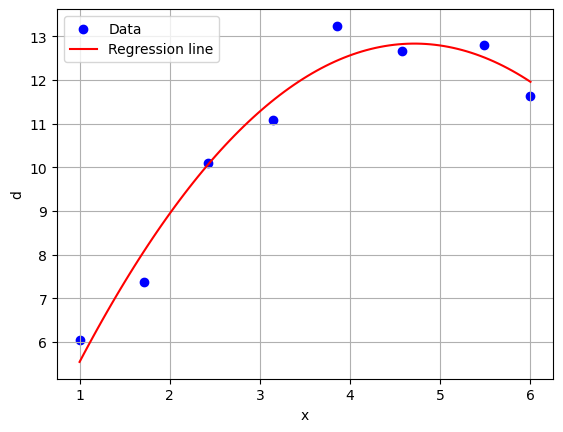

In [139]:
for xi, yi in zip(x_no_bias, d):
    print(
        f"({xi}, {yi})")

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of your data points
plt.scatter(x_no_bias, d, color="blue", label="Data")

# Regression curve: y = a*x^2 + bx + c
xx = np.linspace(min(x_no_bias), max(x_no_bias), 100)
yy = a_second * xx**2 + b_second * xx + c_second

plt.plot(xx, yy, color="red", label="Regression line")

plt.xlabel("x")
plt.ylabel("d")
plt.legend()
plt.grid(True)
plt.show()



## 1c.
Increase the order of the polynomial to **6** and fit the curve.  
How much error do you measure this time?  
Plot the 6th order curve.
|

In [140]:
x_sixth = np.array([
    [1**6,      1**5,      1**4,      1**3,      1**2,      1,      1],
    [1.7143**6, 1.7143**5, 1.7143**4, 1.7143**3, 1.7143**2, 1.7143, 1],
    [2.4286**6, 2.4286**5, 2.4286**4, 2.4286**3, 2.4286**2, 2.4286, 1],
    [3.1429**6, 3.1429**5, 3.1429**4, 3.1429**3, 3.1429**2, 3.1429, 1],
    [3.8571**6, 3.8571**5, 3.8571**4, 3.8571**3, 3.8571**2, 3.8571, 1],
    [4.5714**6, 4.5714**5, 4.5714**4, 4.5714**3, 4.5714**2, 4.5714, 1],
    [5.4857**6, 5.4857**5, 5.4857**4, 5.4857**3, 5.4857**2, 5.4857, 1],
    [6**6,      6**5,      6**4,      6**3,      6**2,      6,      1]
])

x_sixth_T = x_sixth.T

x_sixth_cross = LA.inv(x_sixth_T @ x_sixth) @ x_sixth_T
w6 = x_sixth_cross @ d   # coefficients for deg 6 polynomial

print("w6:", w6)


w6: [-0.00747583  0.13410632 -0.86595401  2.2005262  -1.0565078  -0.59818157
  6.22958234]


In [141]:
squared_error_sixth = 0

# unpack weights
a6, b6, c6, d6, e6, f6, g6 = w6

for i in range(len(d)):
    xi = x_no_bias[i,0]   # scalar x value
    pred_sixth = (
        a6*xi**6 +
        b6*xi**5 +
        c6*xi**4 +
        d6*xi**3 +
        e6*xi**2 +
        f6*xi +
        g6
    )
    error_sixth = pred_sixth - d[i]
    squared_error_sixth += error_sixth**2

mse_sixth = squared_error_sixth / len(d)
print("MSE (6th order):", mse_sixth)


MSE (6th order): 0.10800458701013534


([1.], 6.0532)
([1.7143], 7.3837)
([2.4286], 10.0891)
([3.1429], 11.0829)
([3.8571], 13.2337)
([4.5714], 12.671)
([5.4857], 12.7972)
([6.], 11.6371)


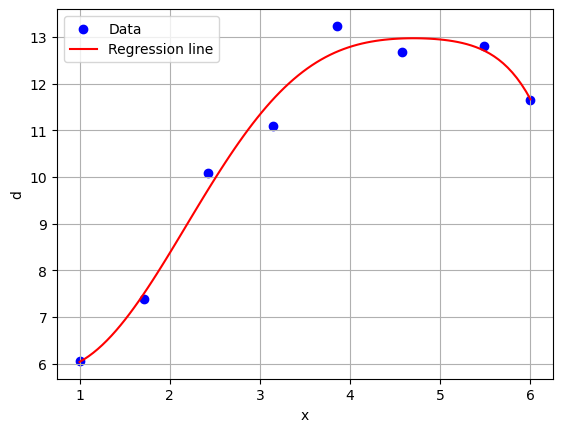

In [142]:
for xi, yi in zip(x_no_bias, d):
    print(
        f"({xi}, {yi})")

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of your data points
plt.scatter(x_no_bias, d, color="blue", label="Data")

# Regression 6th order curve: y = a*x^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g
xx = np.linspace(min(x_no_bias), max(x_no_bias), 100)
yy = a6 * xx**6 + b6 * xx**5 + c6 * xx**4 + d6 * xx**3 + e6 * xx**2 + f6 * xx**1 + g6

plt.plot(xx, yy, color="red", label="Regression line")

plt.xlabel("x")
plt.ylabel("d")
plt.legend()
plt.grid(True)
plt.show()



## 1d.
Remove one data point (**d: 12.7772, x: 5.2857**) from your set.  
Once again fit the 6th order polynomial.  
After finding the polynomial bring that data point back and once again measure the cost function for all data points.  

- How much has the value of the cost function changed compared to the 6th order polynomial where all data points were used for curve fitting?  
- Is the 6th order polynomial a case of **overfitting**?  

Plot the new 6th order curve.


In [143]:
# 7 samples × 7 features (no 5.4857 row)

x_sixth_new = np.array([
    [1**6,      1**5,      1**4,      1**3,      1**2,      1,      1],
    [1.7143**6, 1.7143**5, 1.7143**4, 1.7143**3, 1.7143**2, 1.7143, 1],
    [2.4286**6, 2.4286**5, 2.4286**4, 2.4286**3, 2.4286**2, 2.4286, 1],
    [3.1429**6, 3.1429**5, 3.1429**4, 3.1429**3, 3.1429**2, 3.1429, 1],
    [3.8571**6, 3.8571**5, 3.8571**4, 3.8571**3, 3.8571**2, 3.8571, 1],
    [4.5714**6, 4.5714**5, 4.5714**4, 4.5714**3, 4.5714**2, 4.5714, 1],
    [6**6,      6**5,      6**4,      6**3,      6**2,      6,      1]
])

# Transpose: 7 features × 7 samples
x_sixth_new_T = x_sixth_new.T

# Normal equation solve
x_sixth_new_cross = LA.inv(x_sixth_new_T @ x_sixth_new) @ x_sixth_new_T
w6_new = x_sixth_new_cross @ np.delete(d, 6)  # delete the d at index 6 (12.7972)

print("w6 (without 5.4857,12.7972):", w6_new)


w6 (without 5.4857,12.7972): [ 1.99586081e-01 -3.90495149e+00  3.02041655e+01 -1.17782534e+02
  2.42504693e+02 -2.44784135e+02  9.96163764e+01]


In [144]:
squared_error_sixth_new = 0

# unpack weights
a6_new, b6_new, c6_new, d6_new, e6_new, f6_new, g6_new = w6_new


for i in range(len(d)):
    xi = x_no_bias[i,0]   # scalar x value
    pred_sixth_new = (
        a6_new*xi**6 +
        b6_new*xi**5 +
        c6_new*xi**4 +
        d6_new*xi**3 +
        e6_new*xi**2 +
        f6_new*xi +
        g6_new
    )
    error_sixth_new = pred_sixth_new - d[i]
    squared_error_sixth_new += error_sixth_new**2

mse_sixth_new = squared_error_sixth_new / len(d)
print("MSE (6th order):", mse_sixth_new)


MSE (6th order): 10.96585716733042


([1.], 6.0532)
([1.7143], 7.3837)
([2.4286], 10.0891)
([3.1429], 11.0829)
([3.8571], 13.2337)
([4.5714], 12.671)
([6.], 11.6371)


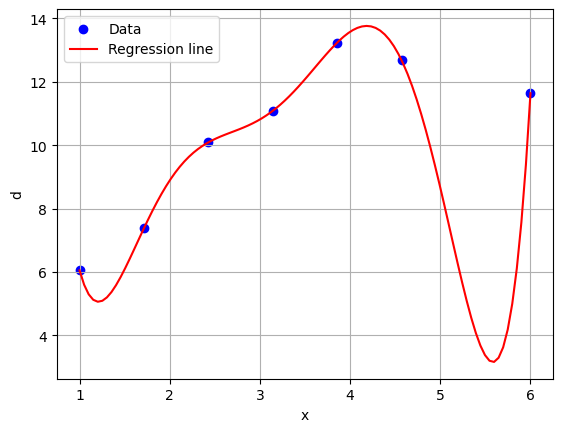

As shown in the previous example, the MSE for 6th order was 0.10800458701013534, but when we remove one data point, the MSE became 10.96585716733042. This is a drastic increase of a multiple of over 100. We can conclude it is because our order was too high for the amount of data points we had. This is a clear showcase of the dangers of overfitting.


In [145]:
x_no_bias_point_removed = np.array([
    [1],
    [1.7143],
    [2.4286],
    [3.1429],
    [3.8571],
    [4.5714],
    [6]
])


d_point_removed = np.array([6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 11.6371])



for xi, yi in zip(x_no_bias_point_removed, d_point_removed):
    print(
        f"({xi}, {yi})")

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of your data points
plt.scatter(x_no_bias_point_removed, d_point_removed, color="blue", label="Data")

# Regression 6th order curve: y = a*x^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx + g
xx = np.linspace(min(x_no_bias), max(x_no_bias), 100)
yy = a6_new * xx**6 + b6_new * xx**5 + c6_new * xx**4 + d6_new * xx**3 + e6_new * xx**2 + f6_new * xx**1 + g6_new

plt.plot(xx, yy, color="red", label="Regression line")

plt.xlabel("x")
plt.ylabel("d")
plt.legend()
plt.grid(True)
plt.show()

print("As shown in the previous example, the MSE for 6th order was 0.10800458701013534, but when we remove one data point, the MSE became 10.96585716733042. This is a drastic increase of a multiple of over 100. We can conclude it is because our order was too high for the amount of data points we had. This is a clear showcase of the dangers of overfitting.")


## 1e.
Plot the value of the cost function as a function of the polynomial order (**from 1 to 10**) using all data points.  
Based on this curve, which order is suitable for this dataset to avoid over- or under-fitting?


Degree 0:
Weights: [10.6184875]
MSE: 6.07976672359375 

Degree 1:
Weights: [1.24435108 6.23214995]
MSE: 1.7872722572247464 

Degree 2:
Weights: [-0.52837073  4.98061174  1.09191476]
MSE: 0.22084807053124944 

Degree 3:
Weights: [-0.09376184  0.45446827  1.99667172  3.53434385]
MSE: 0.14012432434799862 

Degree 4:
Weights: [ 0.0340037  -0.56623289  2.69728344 -2.18835761  6.01559341]
MSE: 0.1233031841921527 

Degree 5:
Weights: [ -0.02491761   0.47167928  -3.44098103  11.3822658  -14.00584892
  11.66053211]
MSE: 0.10927899894288405 

Degree 6:
Weights: [-0.00747583  0.13410632 -0.86595401  2.2005262  -1.0565078  -0.59818157
  6.22958234]
MSE: 0.1080045870101429 

Degree 7:
Weights: [-1.00939515e-01  2.49235284e+00 -2.53267562e+01  1.36618684e+02
 -4.20128312e+02  7.31250967e+02 -6.58099499e+02  2.39346705e+02]
MSE: 3.959725640680996e-09 



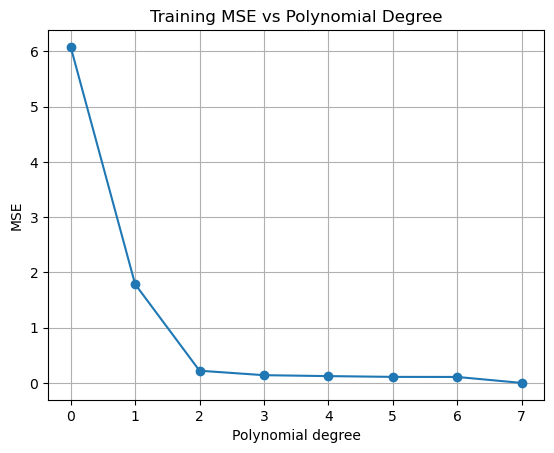

We see that degree 2 is suitable to be our degree, since anything after 2 does not provide significant decrease.
Please note that we cannot increase to degree 8 or above. The Pseudo inverse uses the inverse function of the X_Matrix and its transpose, and since we only have 8 rows in this matrix, there can be a maximum of 8 linearly independant columns. There are infinite solutions since the matrix is not invertible, it is not full rank, the new rows are linearly dependant. Since degree 0 (bias) gets a column, this means we can only go up to degree 7, if not, the matrix will not be invertible. Although from the data collected we see degree 7 has the best MSE (near zero), however, it is not optimal as it is extra work and computation to have the model match all of the points. For this reason, degree 2 performs well enough


In [146]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

X = x_no_bias.ravel()   
Y = d                   

degree = 7
degrees = []
mses = []

for deg in range(0, degree + 1):
    # build polynomial design matrix in highest→lowest order
    cols = [X**p for p in range(deg, -1, -1)]
    X_matrix = np.column_stack(cols)

    # normal equation using cross pseudoinverse
    X_T = X_matrix.T
    X_cross = LA.inv(X_T @ X_matrix) @ X_T
    w = X_cross @ Y

    # predictions and MSE
    y_pred = X_matrix @ w
    mse = np.mean((y_pred - Y)**2)

    print(f"Degree {deg}:")
    print("Weights:", w)
    print("MSE:", mse, "\n")

    degrees.append(deg)
    mses.append(mse)

# plot MSE vs degree
plt.plot(degrees, mses, marker='o')
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.title("Training MSE vs Polynomial Degree")
plt.grid(True)
plt.show()

print("We see that degree 2 is suitable to be our degree, since anything after 2 does not provide significant decrease.")
print("Please note that we cannot increase to degree 8 or above. The Pseudo inverse uses the inverse function of the X_Matrix and its transpose, and since we only have 8 rows in this matrix, there can be a maximum of 8 linearly independant columns. There are infinite solutions since the matrix is not invertible, it is not full rank, the new rows are linearly dependant. Since degree 0 (bias) gets a column, this means we can only go up to degree 7, if not, the matrix will not be invertible. Although from the data collected we see degree 7 has the best MSE (near zero), however, it is not optimal as it is extra work and computation to have the model match all of the points. For this reason, degree 2 performs well enough")


## 2a.
Consider a 2-dimensional classification dataset with the given desired values for each point:

- x1 = [0.5, 0.8, 0.9, 1.0, 1.1, 2.0, 2.2, 2.5, 2.8, 3.0]  
- x2 = [0.5, 0.2, 0.9, 0.8, 0.3, 2.5, 3.5, 1.8, 2.1, 3.2]  
- d = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Here for **(x1 = 0.5, x2 = 0.5)** the desired value is **0.0**, and for **(x1 = 3.0, x2 = 3.2)** the desired value is **1.0**.

Use the **logistic regression algorithm** to design a supervised classifier that can perfectly separate these two sets.  
Plot these data points and your decision line.


In [147]:
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def error_function(X, d, w):
    y = sigmoid(X @ w)
    return -0.5 * np.sum(d*np.log(y + 1e-12) + (1 - d)*np.log(1 - y + 1e-12))

def gradient(X, d, w):
    y = sigmoid(X @ w)
    return -0.5 * (X.T @ (d - y))

def gradient_descent(eta, w, X, d):
    E_old = error_function(X, d, w)
    iters = 0
    while iters < 10000:
        g = gradient(X, d, w)
        w_new = w - eta * g
        E_new = error_function(X, d, w_new)

        # halve eta until cost decreases
        while E_new > E_old:
            eta *= 0.5
            if eta < 0.0000000000000000000001:
                break
            w_new = w - eta * g
            E_new = error_function(X, d, w_new)

        # accept
        if abs(E_old - E_new) < 0.0000000000000000000001:
            w = w_new
            E_old = E_new
            break

        w = w_new
        E_old = E_new
        iters += 1

    return w, E_old

In [148]:
x1 = np.array([0.5, 0.8, 0.9, 1.0, 1.1, 2.0, 2.2, 2.5, 2.8, 3.0])
x2 = np.array([0.5, 0.2, 0.9, 0.8, 0.3, 2.5, 3.5, 1.8, 2.1, 3.2])
d  = np.array([0,0,0,0,0,1,1,1,1,1])

X = np.column_stack((x1, x2, np.ones_like(x1)))   # (10,3)

w = np.array([0.0, 0.0, 0.0])
eta = 0.1

w, E = gradient_descent(eta, w, X, d)
print("w:", w)
print("final cost:", E)


    



w: [  4.29615704   4.86673832 -13.72996384]
final cost: 0.006495124832352477


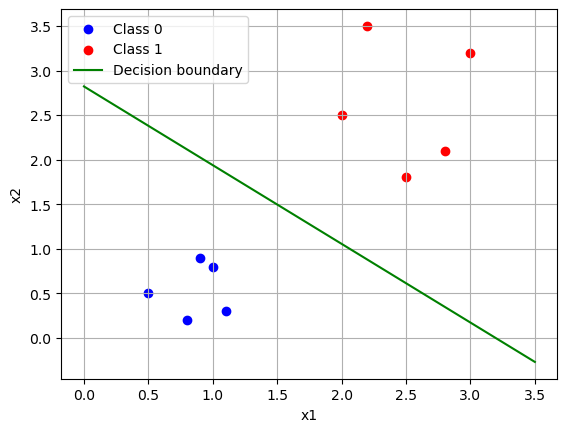

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Separate the classes
class0 = (d == 0)
class1 = (d == 1)

plt.scatter(x1[class0], x2[class0], color="blue", label="Class 0")
plt.scatter(x1[class1], x2[class1], color="red", label="Class 1")

# Decision boundary: w1*x1 + w2*x2 + w0 = 0
xx = np.linspace(min(x1)-0.5, max(x1)+0.5, 100)
yy = -(w[0] * xx + w[2]) / w[1]

plt.plot(xx, yy, color="green", label="Decision boundary")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


## 2b.
Increase the order of the decision making curve to **2** and once again use the logistic regression to design the classifier.  
How do you compare these two classifiers?


In [150]:
# make quadratic design matrix (2b)
X2 = np.column_stack((
    x1,
    x2,
    x1**2,
    x2**2,
    x1*x2,
    np.ones_like(x1)   # bias
))

In [151]:
w2 = np.zeros(X2.shape[1])        # 6 weights now
w2, E2 = gradient_descent(0.1, w2, X2, d)
print("w (quadratic):", w2)
print("final cost (quadratic):", E2)


w (quadratic): [-3.34366304 -2.06957825  1.79458169  1.62133754  2.00250495 -6.11971887]
final cost (quadratic): 0.0025027761127076665


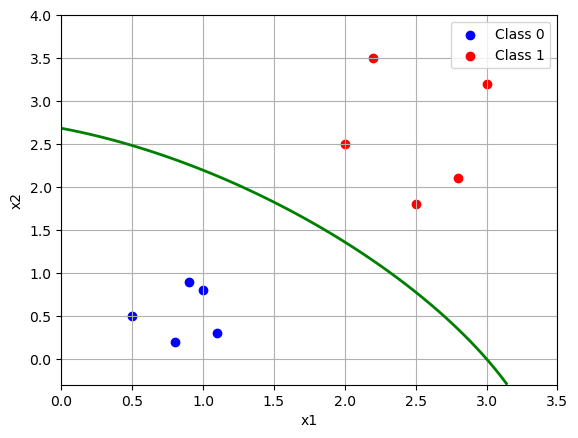

In [152]:
import matplotlib.pyplot as plt
# scatter points
c0 = (d==0); c1 = (d==1)
plt.scatter(x1[c0], x2[c0], color="blue", label="Class 0")
plt.scatter(x1[c1], x2[c1], color="red",  label="Class 1")

# grid + contour for the curve
g1 = np.linspace(x1.min()-0.5, x1.max()+0.5, 400)
g2 = np.linspace(x2.min()-0.5, x2.max()+0.5, 400)
G1, G2 = np.meshgrid(g1, g2)

W1, W2, W3, W4, W5, B = w2
Z = (W1*G1 + W2*G2 + W3*G1**2 + W4*G2**2 + W5*G1*G2 + B)

plt.contour(G1, G2, Z, levels=[0], colors=["green"], linewidths=2)  # decision curve
plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(); plt.grid(True); plt.show()


COMPARING BOTH CLASSIFIERS

/var/folders/z5/5_8rgbk96_q0q_5p_p24k7y80000gn/T/ipykernel_26107/538949274.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(G1, G2, Z_lin, levels=[0], colors=["green"], linewidths=2, linestyles="--", label="Linear boundary")
/var/folders/z5/5_8rgbk96_q0q_5p_p24k7y80000gn/T/ipykernel_26107/538949274.py:21: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(G1, G2, Z_quad, levels=[0], colors=["black"], linewidths=2, label="Quadratic boundary")


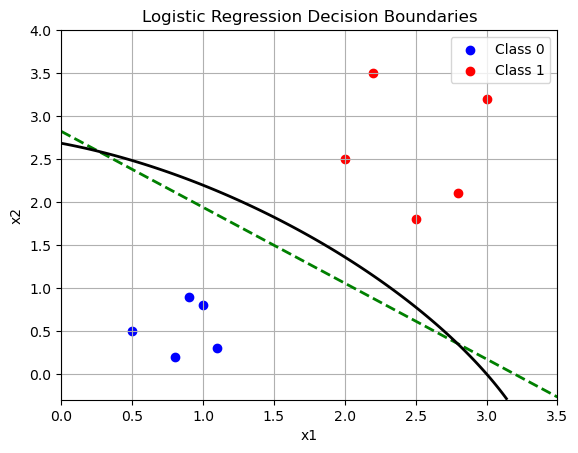

In [153]:
import matplotlib.pyplot as plt

# scatter points
c0 = (d==0); c1 = (d==1)
plt.scatter(x1[c0], x2[c0], color="blue", label="Class 0")
plt.scatter(x1[c1], x2[c1], color="red",  label="Class 1")

# grid
g1 = np.linspace(x1.min()-0.5, x1.max()+0.5, 400)
g2 = np.linspace(x2.min()-0.5, x2.max()+0.5, 400)
G1, G2 = np.meshgrid(g1, g2)

#linear boundary from 2a
W1, W2, B = w
Z_lin = W1*G1 + W2*G2 + B
plt.contour(G1, G2, Z_lin, levels=[0], colors=["green"], linewidths=2, linestyles="--", label="Linear boundary")

# quadratic boundary
W1, W2, W3, W4, W5, B = w2
Z_quad = W1*G1 + W2*G2 + W3*G1**2 + W4*G2**2 + W5*G1*G2 + B
plt.contour(G1, G2, Z_quad, levels=[0], colors=["black"], linewidths=2, label="Quadratic boundary")

plt.xlabel("x1"); plt.ylabel("x2")
plt.title("Logistic Regression Decision Boundaries")
plt.legend(["Class 0", "Class 1", "Linear boundary", "Quadratic boundary"])
plt.grid(True); plt.show()


As we can see, both classifiers behave properly and are able to classify the data. However, it is quite noticable that the second order line is not needed for this data set, it is extra work which is unecessary, The linear line is capable of proerly classifiying the data. 